# Qubits to Linear Algebra: Mathematical Toolkit

*(building directly on § 1.2 “Qubit representations & mainstream hardware”)*


| Code | Outcome |
|------|---------|
| 2.0-A | **distinguish** a classical bit from a qubit in one sentence. |
| 2.0-B | **write** an arbitrary single-qubit pure state as $\lvert\psi\rangle=\alpha\lvert0\rangle+\beta\lvert1\rangle$ and **explain** why $\lvert\alpha\lvert^2 + \lvert\beta\lvert^2 = 1$. |
| 2.0-C | **compute** measurement probabilities and **plot** the corresponding Bloch-sphere vector using the provided Python cell. |
| 2.0-D | **interpret** latitude $(\theta)$ and longitude $(\phi)$ angles on the Bloch sphere in terms of amplitudes. |

---

## 2.0 Recap - From Physical Qubits to State-Vectors

> How every physical qubit maps to a unit-norm vector in $\mathbb C^{2}$ and how the Bloch-sphere parameters $(\theta,\phi)$ encode amplitudes. 
>
> This abstraction lets us ignore hardware details and perform algorithm design entirely in linear-algebra terms.

![Bloch sphere annotated](images/two-electonic-levels-nielsen-and-chuang-toc-and-chapter1-nov00.png)

> **Take-away:** physical implementation-ion-trap, superconducting, photonic-can be abstracted as a **two-level quantum system** whose logical states we call  
> $$
> \lvert0\rangle,\; \lvert1\rangle .
> $$

* qubit is an analogous to classical bit; 

| Classical bit | Quantum bit (qubit) |
|--------------|---------------------|
| stores 0 *or* 1 | stores a **state-vector** in $\mathbb C^{2}$ : $\displaystyle \lvert\psi\rangle=\alpha\lvert0\rangle+\beta\lvert1\rangle$ |
| operations are Boolean gates | operations are **unitaries** (reversible 2×2 matrices) |

---

### Single-qubit pure state

Quantum systems have states, and for a qubit those orthogonal states are 
$ \lvert0\rangle$ and $\lvert1\rangle $  [using ket notation].

*  $\lvert0\rangle$ and $\lvert1\rangle$ are known as the *computational basis* states.

* It is possible to have linear combinations of states, called *superpositions* where $\alpha$ \& $\beta$ are complex values:

    $$|\psi\rangle = \alpha \lvert0\rangle + \beta \lvert1\rangle$$

* $\lvert0\rangle$ and $\lvert1\rangle$ form an ortho-normal basis for the qubit 2-dimensional complex vector space.

---

### Measurement Probabilities

$\alpha$ & $\beta$ are (complex valued) amplitudes which give the measurement probability on obtaining a basis outcome $\lvert0\rangle$ or $\lvert1\rangle$.

* $P(\lvert0\rangle) = \lvert\alpha\lvert^2  \quad  P(\lvert1\rangle) = \lvert\beta\lvert^2$
    > For a pure state of a 3 qubit register, the probability of measuring one basis state would be:
    >
    > $ P(\lvert010\rangle) = \lvert\alpha_1\beta_2\alpha_3\lvert^2$

* The sum of probabilities of each of the basis outcomes must be 1, making the state a unit vector.

* The quantum system is *completely described* by this unit vector in the state space, its state-vector.

    > So the pure state $\lvert\psi\rangle$ of a qubit is a unit vector in a 2-D complex vector space (actually *Hilbert* space, we see later).
    > 
    > $ |\alpha|^2 + |\beta|^2 = 1 \rightarrow$ the state-vector is **unit-norm**.

---

### Bloch-sphere picture

All single-qubit pure states live on the unit sphere in $\mathbb C^{3}$:

$$
\lvert\psi\rangle
=\cos\frac{\theta}{2}\,\lvert0\rangle
+\;e^{i\varphi}\sin\frac{\theta}{2}\,\lvert1\rangle ,
\quad
0\le\theta\le\pi,\;0\le\varphi<2\pi .
$$

![Bloch sphere annotated](images/blocksphere-nielsen-and-chuang-toc-and-chapter1-nov00.png)

> *create a Bloch vector for $\theta=\pi/3,\;\phi=\pi/2$ and plot it.*

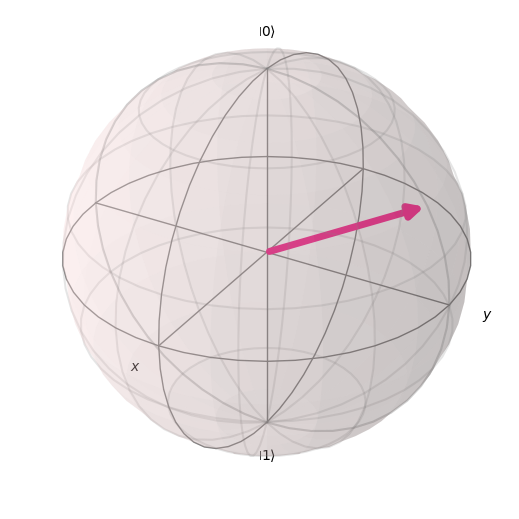

In [1]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

theta, phi = np.pi/3, np.pi/2
bloch_vec = [np.sin(theta)*np.cos(phi),   # x
             np.sin(theta)*np.sin(phi),   # y
             np.cos(theta)]               # z
plot_bloch_vector(bloch_vec)


## 2.1 Dirac Notation & Multi‑Qubit Basis

Compact bra‑ket language and the $2^{n}$-dimensional computational basis for $n$ qubits. 

Provides the shorthand used in all quantum‑algorithm papers and allows us to label, index and program multi‑qubit circuits unambiguously. 

| Code | Outcome |
|------|---------|
| 2.1‑A | **translate** between column‑vector and $\lvert\cdot\rangle$ notation for any 2‑component state. |
| 2.1‑B | **enumerate** all $2^{n}$ computational basis states for $n\le 3$ and **state** the dimension of the Hilbert space. |
| 2.1‑C | **normalise** a given two‑qubit amplitude list and **verify** the norm with Python. |

---

#### Kets and Bras

A **ket** is a column vector

$$
\lvert\psi\rangle \;=\;
\begin{pmatrix}
\psi_0 \\ \psi_1 \\ \vdots \\ \psi_{d-1}
\end{pmatrix},
$$
while its **bra** is the conjugate‑transpose (row)  
$$
\langle\psi\lvert \;=\;
\bigl(\psi_0^{\!*},\;\psi_1^{\!*},\;\dots,\;\psi_{d-1}^{\!*}\bigr).
$$

---

#### Computational basis  

Dirac notation uses bit strings $\{0,1\}^n$ (e.g. $\lvert0\rangle$ and $\lvert1\rangle$)

* For $n$ qubits the *computational (standard) basis* is  
    > $\bigl\{\;\lvert x\rangle : x\in\{0,1\}^{\,n}\bigr\},$
    >
    > a set of $2^{n}$ mutually orthonormal vectors.
    >
    > If $n = 3$, one standard basis is $\lvert011\rangle$, and $\langle011\lvert$ is the row vector: $(00010000)$.

---

#### Example - two qubits  

A general pure state of two qubits is  

$$
\lvert\phi\rangle \;=\;
\alpha_{00}\lvert 00\rangle + 
\alpha_{01}\lvert 01\rangle + 
\alpha_{10}\lvert 10\rangle + 
\alpha_{11}\lvert 11\rangle
$$
$$
\qquad
\|\phi\|^{2}
=\sum_{i,j\in\{0,1\}} |\alpha_{ij}|^{2}=1 .
$$

In [2]:
#### Quick Python check - normalise a random two-qubit state
import numpy as np

# random complex amplitudes
amps = np.random.randn(4) + 1j*np.random.randn(4)
phi  = amps / np.linalg.norm(amps)          # normalise

print("State vector |φ⟩ =", phi)
print("Norm² =", np.vdot(phi, phi).real)    # should print 1.0

State vector |φ⟩ = [-0.73202702-0.03449025j -0.20235518+0.3679845j   0.10864371-0.09399594j
  0.49096349-0.15780625j]
Norm² = 1.0


## 2.2 Vector Spaces Refresher

 Addition, scalar multiplication, spanning sets, linear independence, and what a *basis* really is. 
 
 These are the axioms under every quantum proof; without them you can’t talk about dimensions, change‑of‑basis, or well‑posed linear systems. 


| Code | Outcome |
|------|---------|
| 2.2‑A | **perform** vector addition and scalar multiplication on complex $n$-tuples in code. |
| 2.2‑B | **identify** whether a provided set of vectors in $\mathbb C^{n}$ is linearly independent. |
| 2.2‑C | **express** $\lvert0\rangle,\lvert1\rangle$ as explicit column matrices and **show** they form a basis of $\mathbb C^{2}$. |

---

#### Complex Vector Space Addition and Scalar multiplication


A complex vector space **vector space** V over $\mathbb C$ of dimension $n$, $V=C^n$, is the set  
$$
\mathbb C^{\,n}\;=\;\bigl\{(z_{1},\dots,z_{n})^{T}\;|\;z_k\in\mathbb C\bigr\},
$$
equipped with  

* **Addition**  
  $$
  (v+w)_k \;=\; v_k + w_k ,
  $$

* **Scalar multiplication**  
  $$
  (\lambda v)_k \;=\; \lambda\,v_k ,\quad \lambda\in\mathbb C .
  $$


The **zero vector** $0=(0,\dots,0)^{T}$ satisfies $v+0=v$.

* **Zero vector** $0$ has all elements as 0: $(0, 0, ... , 0)$

* **Zero element**

---

#### Spanning Sets & Bases  


A list of vectors $\{v_1,\dots,v_m\}\subseteq\mathbb C^{n}$

* **spans** the space if every $u\in\mathbb C^{n}$ can be written  
  $u=\sum_{j=1}^{m} \alpha_j v_j$.  
* is **linearly independent** if $\sum\alpha_j v_j = 0$ implies all $\alpha_j=0$.

If it both spans and is independent, it is a **basis**; any basis of $\mathbb C^{n}$ contains exactly $n$ vectors.

---

#### Single‑Qubit Example  

For one qubit, the matrix representation the computational–basis kets, $\lvert0\rangle$ and $\lvert1\rangle$, are:
$$
\lvert0\rangle=\begin{pmatrix}1\\0\end{pmatrix},
\quad
\lvert1\rangle=\begin{pmatrix}0\\1\end{pmatrix}
$$

* They span $\mathbb C^{2}$

* Are independent because neither row elements sum to zero: $1 + 0 = 1$ and $0 + 1 = 1$

* Therefore form a basis.

---


In [3]:
#### Python demo - linear independence test
import numpy as np

e0 = np.array([1,0])
e1 = np.array([0,1])
M  = np.column_stack([e0, e1])   # 2×2 matrix whose columns are the vectors

rank = np.linalg.matrix_rank(M)
print("Rank =", rank, " (basis)" if rank==2 else " (not independent)")

# Verify in Python that X ∣0⟩=∣1⟩X∣0⟩=∣1⟩.
X = np.array([[0,1],[1,0]])
print("X\lvert0\rangle =", X.dot(e0))

Rank = 2  (basis)
angle = [0 1]


## 2.3 Linear Operators (Pauli & Friends)

Definition of a linear operator, identity/zero maps, and the Pauli matrices as elementary single‑qubit unitaries. 

Gates *are* linear operators; mastering Pauli algebra is prerequisite for circuit decomposition, error correction and Hamiltonian simulation.

| Code | Outcome |
|------|---------|
| 2.3‑A | **verify** line‑arity of a given matrix function $A(v)$ by symbolic or numeric test. |
| 2.3‑B | **construct** the Pauli matrices in NumPy and **demonstrate** $X^{2}=Y^{2}=Z^{2}=I$. |
| 2.3‑C | **explain** in ≤ 3 sentences why single‑qubit gates must be unitary (linking to reversibility). |

---


#### What is a Linear Operator?  

* linear operator as a function mapping vector spaces V -> W; 

A map $A : V \rightarrow V$ on a vector space $V$ is **linear** if  
$$
A\bigl(\lambda v + w\bigr) \;=\; \lambda\,A v + A w
\qquad\forall\, v,w\in V,\;\lambda\in\mathbb C .
$$

* **Identity operator** $I$ satisfies $I v = v$.  

* Identity matrix:

* **Zero operator** $0$ maps a vector to zero vector and satisfies $0 v = 0$.

---

#### Single‑Qubit Pauli Set

$$
I \;=\;
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix},
\quad
X \;=\;
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix},
\quad
Y \;=\;
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix},
\quad
Z \;=\;
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}.
$$

* **Hermitian**: $P^\dagger = P$.  
* **Unitary**: $P^\dagger P = I$.  
* **Squares to identity**: $P^{2}=I$.

These four matrices plus overall phases generate all single‑qubit unitaries.

---

#### Action on the Bloch Sphere  

* $X$ — rotation by $\pi$ around the **x‑axis**  
* $Y$ — rotation by $\pi$ around the **y‑axis**  
* $Z$ — rotation by $\pi$ around the **z‑axis**  

![Pauli rotations](images/pauli_axes.png)

---

In [4]:
#### Python sandbox - verify Pauli algebra
import numpy as np

I = np.eye(2, dtype=complex)
X = np.array([[0,1],[1,0]], dtype=complex)
Y = np.array([[0,-1j],[1j,0]], dtype=complex)
Z = np.array([[1,0],[0,-1]], dtype=complex)

for name, P in [('X',X), ('Y',Y), ('Z',Z)]:
    print(f"{name}² == I ?", np.allclose(P @ P, I))
    print(f"{name}† {name} == I ?", np.allclose(P.conj().T @ P, I))

import numpy as np
I = np.eye(2)
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])

X² == I ? True
X† X == I ? True
Y² == I ? True
Y† Y == I ? True
Z² == I ? True
Z† Z == I ? True


Exercise: verify $X^2=Y^2=Z^2=IX^2=Y^2=Z^2=I$.

    Bloch‑sphere view — XX flips the sphere around the x‑axis, ZZ around z‑axis (see textbook figures pauli_x.png, pauli_z.png).

## 2.4 Inner Product, Norm & Orthogonality

The Dirac inner product, state normalisation and the geometric test for orthogonality. 

Inner products become measurement probabilities and kernel entries; norms guarantee those probabilities sum to 1 and ensure numerical stability.

| Code | Outcome |
|------|---------|
| 2.4‑A | **compute** $\langle v \lvert w\rangle$ for two arbitrary complex vectors with a helper function. |
| 2.4‑B | **determine** if two qubit states are orthogonal via the inner product. |
| 2.4‑C | **normalise** any non‑zero state vector to unit norm using Python. |

---

### Dual Vector in Dirac (Bra–Ket) Notation

Given a ket  
$$
\boxed{\;\lvert\psi\rangle \in \mathcal H\;}
$$  
— a column vector in the Hilbert space $\mathcal H$ —

its **dual vector** (or **bra**) is  

$$
\boxed{\;\langle\psi\rvert \equiv \bigl(\lvert\psi\rangle\bigr)^{\dagger}\;}
$$

* **Mathematically:**  
  $\langle\psi|$ lives in the **dual space** $\mathcal H^{*}$, the set of linear functionals that map kets to complex numbers.

* **Operationally:**  
  For any ket $\lvert\phi\rangle$,
  $$
  \langle\psi\,|\,\phi\rangle
  = \mathrm{inner\;product}(\psi,\phi)
  \in \mathbb C .
  $$

* **Matrix picture:**  
  If $\lvert\psi\rangle$ is the column vector $\begin{pmatrix}\psi_0\\\psi_1\\\vdots\end{pmatrix}$,
  then  
  $$
  \langle\psi\rvert = \bigl(\psi_0^{\!*},\;\psi_1^{\!*},\;\dots\bigr)
  $$
  — i.e., the **conjugate‑transpose** (adjoint) of the ket.

Thus the bra $\langle\psi|$ is the dual vector that, via the inner product, turns any ket into a complex scalar.

---

#### Matrix refresher Adjoint (Conjugate‑Transpose) of a Complex Matrix  

**Complex Conjugate**

For any complex number  $z = a + ib , \qquad a,b\in\mathbb R$,   its **conjugate** is  $z^{*} = a - ib$.

That is:

| Component | Before conjugation | After conjugation |
|-----------|-------------------|-------------------|
| Real part | $ \operatorname{Re}(z)=a $ | **unchanged** |
| Imag part | $ \operatorname{Im}(z)=b $ | **sign flips** → $-b$ |

**Adjoint (Conjugate‑Transpose)**

For any complex matrix $A \in \mathbb{C}^{m\times n}$, the **adjoint**—also called the **Hermitian conjugate** or **conjugate‑transpose**—is denoted $A^{\dagger}$ and defined by  

$$
\boxed{\;
A^{\dagger} \;=\; \bigl(A^{*}\bigr)^{\mathsf T}
\;}
$$

where  

* $A^{*}$  = element‑wise **complex conjugate** of $A$  
* $(\cdot)^{\mathsf T}$ = **transpose** operation (rows ↔ columns).

Equivalently, the matrix elements satisfy  

$$
\bigl(A^{\dagger}\bigr)_{ij} = \bigl(A_{ji}\bigr)^{*}.
$$


##### Key properties  

* $\bigl(A^{\dagger}\bigr)^{\dagger} = A$  
* $(AB)^{\dagger} = B^{\dagger}A^{\dagger}$ (order reverses)  
* A matrix is **Hermitian** if $A^{\dagger}=A$; **unitary** if $A^{\dagger}A = I$.

In [5]:
import numpy as np

A = np.array([[1+2j, 3-1j],
              [4+0j, 5+5j]])

A_dag = A.conj().T    # conjugate-transpose
print("A† =\n", A_dag)

A† =
 [[1.-2.j 4.-0.j]
 [3.+1.j 5.-5.j]]


---

#### Dirac Inner Product

Notation if inner product of two states : $\langle v | w \rangle$ or $(v,w)$.

For vectors $v,w\in\mathbb C^{\,n}$

$$
\boxed{\;
\langle v \,|\, w\rangle \;=\; v^{\dagger} w
\;=\; \sum_{k=1}^{n} v_k^{\!*}\,w_k
\;}
$$

* **Conjugate symmetry** $\langle v|w\rangle = \langle w|v\rangle^{*}$  
* **Linearity in the second slot** $\langle v|(\alpha w+\beta u)\rangle = \alpha\,\langle v|w\rangle+\beta\,\langle v|u\rangle$

(This makes $(\mathbb C^{n},\langle\cdot|\cdot\rangle)$ an **inner‑product space**, also know as a **Hilbert Space**.)

---

#### Norm (Length) and Normalisation  

$$
\|v\| \;=\; \sqrt{\langle v|v\rangle}
$$

A **quantum state‑vector** must satisfy $\|v\|=1$. To normalise:

$$
\lvert\psi_{\text{norm}}\rangle = \frac{\lvert\psi\rangle}{\|\,\psi\|}
$$

---

#### Orthogonality  

Vectors $v,w$ are **orthogonal** iff inner product is zero:

$$
\langle v | w\rangle = 0 .
$$

For qubits this means the measurement outcomes are perfectly distinguishable.

* Verfy that $\lvert w\rangle \equiv (1, 1)$ and $\lvert v\rangle \equiv (1, -1)$ are orthogonal.
 > What are their normalised forms?
---

In [6]:
#### Python demo - inner product & normalisation
import numpy as np

def inner(v, w):
    return np.vdot(v, w)      # conjugate dot product

# random 2D complex vectors
v = np.random.randn(2) + 1j*np.random.randn(2)
w = np.random.randn(2) + 1j*np.random.randn(2)

print("⟨v|w⟩ =", inner(v, w))

# normalise v
v_norm = v / np.linalg.norm(v)
print("‖v_norm‖² =", inner(v_norm, v_norm).real)

⟨v|w⟩ = (0.6537321240532018-0.5177772916475541j)
‖v_norm‖² = 0.9999999999999998


In [7]:
def inner(v, w):
    return np.vdot(v, w)     # conjugate dot
v = np.array([1,0])
w = np.array([0,1])
print(f'⟨v|w⟩ = {inner(v,w)}')   # 0  ⇒ orthogonal


⟨v|w⟩ = 0


The state‑space with this inner product is a Hilbert space.

## 2.5 Outer Product & Completeness


| Code | Outcome |
|------|---------|
| 2.5‑A | **generate** the outer product $\lvert v\rangle\langle w\rvert$ for two qubit states in code and **interpret** it as a rank‑1 linear operator. |
| 2.5‑B | **prove or verify** numerically that $\sum_{x\in\{0,1\}} \lvert x\rangle\langle x\rvert = I_{2}$ (single‑qubit completeness). |
| 2.5‑C | **extend** the completeness relation to two qubits and **confirm** with a NumPy test. |

* Building operators via vector outer product (dyadic products) and resolving the identity as a sum of projectors. 

* Enables density‑matrix notation, projective measurement theory and the "insert $I$" trick used in block‑encoding and swap‑test derivations. 

---

#### Outer (Dyadic) Product 

Given kets $\lvert v\rangle$ and $\lvert w\rangle$ the **outer product**

$$
\boxed{\;
\lvert v\rangle\langle w\rvert
\;}
$$
is a **linear operator** acting on any $\lvert u\rangle$ as

$$
\bigl(\lvert v\rangle\langle w\rvert\bigr)\lvert u\rangle
= \langle w|u\rangle \, \lvert v\rangle .
$$

*Rank‑1 projector* when $\lvert v\rangle=\lvert w\rangle$.

**Why the name "dyadic"?**

In linear‑algebra literature (especially tensor analysis) a **dyad** refers to a tensor formed from the tensor (outer) product of two vectors; 

Dirac’s $\lvert v\rangle\!\langle w\rvert$ is the quantum‑mechanics version of that concept.

---

#### Projectors & Measurement  

* Quantum measurements are described by a collection $\lbrace M_m \rbrace$, where $m$ refers to the outcomes that may occur.
    * $p(m) = \langle \psi \lvert M_m^{\dagger} M_m \lvert \psi \rangle$ 
    * $p(0) = \langle \psi \lvert M_0^{\dagger} M_0 \lvert \psi \rangle = \langle \psi \lvert M_0 \lvert \psi \rangle = \begin{bmatrix}a^*&b^*\end{bmatrix} \begin{bmatrix}1&0\\0&0\end{bmatrix} \begin{bmatrix}a\\b\end{bmatrix} = \lvert a \lvert ^2$
* Projector onto state $\lvert0\rangle$: $M_0=\lvert0\rangle\langle0\rvert$.  
* Measuring a qubit in the computational basis applies $M_0$ **or** $M_1$ and renormalises, and the state becomes:
    * $\frac{M_m \lvert \psi \rangle}{\sqrt{\langle\psi \lvert M_m^{\dagger} M_m \lvert \psi \rangle }} $ 
    * $\frac{M_0 \lvert \psi \rangle}{\lvert a \lvert} = \frac{a}{\lvert a \lvert} \lvert0 \rangle$ 

---

#### Completeness (Resolution of Identity)  

For any orthonormal basis $\{\lvert e_k\rangle\}$:

$$
\boxed{\;
\sum_{k} \lvert e_k\rangle\langle e_k\rvert = I
\;}
$$

Single qubit:

$$
\lvert0\rangle\langle0\rvert + \lvert1\rangle\langle1\rvert
= \begin{bmatrix}1\\0\end{bmatrix} \begin{bmatrix}1&0\end{bmatrix} + \begin{bmatrix}0\\1\end{bmatrix} \begin{bmatrix}0&1\end{bmatrix}
= \begin{bmatrix}1&0\\0&0\end{bmatrix} + \begin{bmatrix}0&0\\0&1\end{bmatrix}  
= \begin{bmatrix}1&0\\0&1\end{bmatrix} = I_{2}.
$$

Two qubits:

$$
\sum_{x\in\{0,1\}^{2}} \lvert x\rangle\langle x\rvert
= \lvert00\rangle\langle00\rvert+\dots+\lvert11\rangle\langle11\rvert
= I_{4}.
$$

* Measurment operators satisfy the completeness equation.

---

In [8]:
#### Python demo - build projectors & verify completeness
import numpy as np

# basis kets
e0 = np.array([[1],[0]], dtype=complex)
e1 = np.array([[0],[1]], dtype=complex)

P0 = e0 @ e0.T.conj()   # \lvert0\rangle<0|
P1 = e1 @ e1.T.conj()   # \lvert1\rangle<1|
I2 = P0 + P1

print("Projector P0 =\n", P0)
print("Completeness check (I2):\n", I2)


I2 = sum(np.outer(b,b) for b in [v,w])  # v=\lvert0\rangle, w=\lvert1\rangle
print(I2)

Projector P0 =
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Completeness check (I2):
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[1 0]
 [0 1]]


Quick sanity check in Python

In [9]:
# random normalised qubit state
np.random.seed(0)
psi = np.random.randn(2) + 1j*np.random.randn(2)
psi /= np.linalg.norm(psi)

# verify probability sum to 1
probs = np.abs(psi)**2
print("Probabilities:", probs, "sum:", probs.sum())

Probabilities: [0.43990623 0.56009377] sum: 0.9999999999999998


## 2.6 Where We’re Headed

Connecting the toolkit to unitary evolution, block‑encodings, quantum kernels and OC‑SVM workflows.

Gives students a roadmap: each algebraic concept they master today reappears as a lever in real algorithms and the final capstone project. 

### How these outcomes support downstream units

| Toolkit Outcome Block | Enables later ability in … |
|-----------------------|-----------------------------|
| 2.0‑B, 2.0‑C | Constructing and visualising **feature‑map states** for quantum kernels (Unit 4). |
| 2.1‑B, 2.1‑C | Counting Hilbert‑space dimension when doing **complexity estimates** for block‑encodings. |
| 2.2‑B | Proving **linear independence** of Pauli strings in error‑correction (Unit 2.5). |
| 2.3‑B | Implementing **swap‑test circuits** (needs Pauli matrices for measurement bases). |
| 2.4‑A…C | Calculating **kernel inner products** and normalising support‑vector coefficients. |
| 2.5‑A…C | Building the **resolution‑of‑identity** step in block‑encoding proofs (Unit 3+). |

This toolkit equips us for:

* Unitary evolution $U^{\dagger}U=IU^{\dagger}U=I$ $\rightarrow$ reversibility

* Block‑encodings (non‑unitary $A$ embedded in a bigger unitary $U$)

* Quantum kernels & OC‑SVM (swap‑test = inner product circuit)